In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys

if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../')
os.getcwd()

'/home/lehl/development/QueryOptDeepDive'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
from matplotlib.colors import LinearSegmentedColormap, to_rgba_array
from matplotlib.ticker import LogLocator

In [4]:
def query_file_to_ident(file_name):
    ident = file_name.split('.sql')[0]
    return f"{ident[:-1].zfill(2)}{ident[-1]}"

TEST_QUERIES = dict()

for folder in os.listdir('bao/queries'):
    if not folder.startswith('stack__'):
        continue
        
    key = folder.split('stack__')[1]
    
    queries = os.listdir(os.path.join('bao', 'queries', folder, 'test'))
    queries = sorted([query_file_to_ident(x) for x in queries])

    TEST_QUERIES[key] = queries
    
for k in sorted(TEST_QUERIES.keys()):
    print(k)
    print(TEST_QUERIES[k])
    print('---' * 30)

base_query_split_1
['q13__13ad1b8c6bea4fda1892b9fa82cc1ceb9ceb85fc', 'q13__1ddcc8650e17b292bc7344902baffc90c5ae5761', 'q13__935e2051bf80eeafe91aeb6eb719b6b64b9592c2', 'q13__a091adce62743b65c04532e98e8ff3d7e546ea77', 'q13__a3d03772d880754fc4e150d82908757477ae2186', 'q13__add0df9dccb2790c14508e19c9e0deb79fad6ea2', 'q13__d383cd5b4aee7d3f73508e2a1fe5f6d0f7dd42a2', 'q13__d4707be2adfdbc842f42acb1fc16e3a43faf7474', 'q2__q2-001', 'q2__q2-012', 'q2__q2-032', 'q2__q2-035', 'q2__q2-050', 'q2__q2-081', 'q2__q2-094', 'q2__q2-098', 'q7__q7-034', 'q7__q7-036', 'q7__q7-047', 'q7__q7-077', 'q7__q7-082', 'q7__q7-085', 'q7__q7-095', 'q7__q7-099']
------------------------------------------------------------------------------------------
leave_one_out_split_1
['q11__6c5cba419c5b7b02d431aeb5e766d775d812967a', 'q12__547c6bf1994c9b2ba82a7ae32f4b051beabf46fd', 'q13__935e2051bf80eeafe91aeb6eb719b6b64b9592c2', 'q14__5e4835cd72aaa2d7be15b2a5ffa2e66156b3656f', 'q15__543ab3f730e494a69e3d15e59675f491544cb15d', 'q16_

### Training Time of Different Methods

In [5]:
training_time = {
    'Bao': {
        'base_query_split_1': 1.4,
        'leave_one_out_split_1': 1.4,
        'random_split_1': 1.5,
    },
    'Neo': {
        'base_query_split_1': 136.7,
        'leave_one_out_split_1': 145.3,
        'random_split_1': 120.6,
    },
    'Balsa': {
        'base_query_split_1': 172.5,
        'leave_one_out_split_1': 250.1,
        'random_split_1': 286.8,
    },
    'LEON': {
        'base_query_split_1': 127.3,
        'leave_one_out_split_1': 134.2,
        'random_split_1': 140.5,
    },
    'HybridQO': {
        'base_query_split_1': 12.5,
        'leave_one_out_split_1': 13.4,
        'random_split_1': 13.0,
    },
    'PostgreSQL': {
        'base_query_split_1': 0,
        'leave_one_out_split_1': 0,
        'random_split_1': 0,
    }
}

df_training = pd.DataFrame(training_time)
df_training

,Bao,Neo,Balsa,LEON,HybridQO,PostgreSQL
base_query_split_1,1.4,136.7,172.5,127.3,12.5,0
leave_one_out_split_1,1.4,145.3,250.1,134.2,13.4,0
random_split_1,1.5,120.6,286.8,140.5,13.0,0


In [6]:
df_train_agg = df_training.sum().reset_index()
df_train_agg.columns=['method', 'execution_time__sum_h']
df_train_agg['execution_time__sum_d'] = df_train_agg['execution_time__sum_h'] / 24.0
df_train_agg

,method,execution_time__sum_h,execution_time__sum_d
0,Bao,4.3,0.179167
1,Neo,402.6,16.775000
2,Balsa,709.4,29.558333
3,LEON,402.0,16.750000
4,HybridQO,38.9,1.620833
5,PostgreSQL,0.0,0.000000


### Reading all result files

In [7]:
EXECUTION_TIME_OUT = 3 * 60 * 1000.0

df = pd.read_csv('experiment_logs/20240103__STACK__combined.csv')

df.loc[df[df['timed_out']].index, 'execution_time'] = EXECUTION_TIME_OUT
df.loc[df[df['planning_time'] >= EXECUTION_TIME_OUT].index, 'planning_time'] = 0.0

df['prepare_time'] = df['inference_time'] + df['planning_time']

display(df)

,run_id,run_type,experiment,method,query_ident,split,inference_time,planning_time,execution_time,total_time,timed_out,prepare_time
0,0,regular,base_query_split_1,Balsa,q11__0ea8bacde0e13a4314466435cf49c8e685b39fb1,train,87.9,1.083,271.606,360.589,False,88.983
1,1,regular,base_query_split_1,Balsa,q11__0ea8bacde0e13a4314466435cf49c8e685b39fb1,train,992.5,1.082,269.814,1263.396,False,993.582
2,0,regular,base_query_split_1,Balsa,q11__33e1caf220e5bea2e592c82eede1c0427e2c2570,train,115.5,1.728,268.531,385.759,False,117.228
3,1,regular,base_query_split_1,Balsa,q11__33e1caf220e5bea2e592c82eede1c0427e2c2570,train,93.8,1.971,775.176,870.947,False,95.771
4,0,regular,base_query_split_1,Balsa,q11__6c5cba419c5b7b02d431aeb5e766d775d812967a,train,128.6,1.241,293.943,423.784,False,129.841
...,...,...,...,...,...,...,...,...,...,...,...,...
3579,1,regular,NaN,PostgreSQL,q8__q8-074,NaN,0.0,335.158,25.955,361.113,False,335.158
3580,0,regular,NaN,PostgreSQL,q8__q8-076,NaN,0.0,354.519,19.981,374.500,False,354.519
3581,1,regular,NaN,PostgreSQL,q8__q8-076,NaN,0.0,348.760,19.255,368.015,False,348.760
3582,0,regular,NaN,PostgreSQL,q8__q8-096,NaN,0.0,347.515,19.239,366.754,False,347.515


### Create aggregated dataframe
Iterate over all experiments ('split types') and aggregate the numbers across the various runs. Then make the same for PostgreSQL and copy each PostgreSQL run for all these split types, such that the train/test split is applied to make further comparisons easier (even though of course PostgreSQL is not trained in any capacity).

In [8]:
aggregated_dfs = []
split_df = df.groupby(['experiment', 'query_ident', 'split']).count().reset_index().sort_values(['experiment', 'query_ident'])[['experiment', 'query_ident', 'split']]

for (method, run_type, experiment), df_group in df.groupby(['method', 'run_type', 'experiment'], dropna=False):
    if run_type != 'regular':
        continue

    df_group.loc[df_group.index, 'timed_out'] = df_group.loc[df_group.index, 'timed_out'].astype(int)

    x = df_group.groupby(['method', 'run_type', 'experiment', 'query_ident', 'split'], dropna=False)
    aggregated = x.agg({'inference_time': ['mean', 'std'], 'planning_time': ['mean', 'std'], 'execution_time': ['mean', 'std'], 'total_time': ['mean', 'std'], 'prepare_time': ['mean', 'std'], 'timed_out': 'max'}).reset_index()
        
        
    # Fix nested names from double aggregations (mean+std)
    new_col_names = []
    for c in aggregated.columns:
        if c[1] == 'std':
            new_col_names.append(".".join(c))
        else:
            new_col_names.append(c[0])
    aggregated.columns = new_col_names
    
    aggregated = aggregated.sort_values(['query_ident'])
    
    aggregated.loc[aggregated['timed_out'] > 0, 'timed_out'] = 1.0
    aggregated.loc[aggregated['timed_out'] > 0, 'execution_time'] = EXECUTION_TIME_OUT
    # Add correction to total_time
    aggregated['total_time'] = aggregated['inference_time'] + aggregated['planning_time'] + aggregated['execution_time']
    
    # Add number of runs per query
    aggregated['n'] = x.count()['run_id'].tolist()
    
    if method != 'PostgreSQL':
        if 'leave_one_out' in experiment:
            aggregated['base_experiment'] = 'leave_one_out'
        elif 'base_query_split' in experiment:
            aggregated['base_experiment'] = 'base_query'
        elif 'random_split' in experiment:
            aggregated['base_experiment'] = 'random'

        aggregated_dfs.append(aggregated.copy())
    
    else:
        for new_experiment in df['experiment'].dropna().unique():
            tmp = aggregated.copy()
            tmp = tmp.sort_values(['query_ident'])
            
            tmp['experiment'] = new_experiment
            tmp['split'] = split_df[split_df['experiment'] == new_experiment]['split'].tolist()
            
            if 'leave_one_out' in new_experiment:
                tmp['base_experiment'] = 'leave_one_out'
            elif 'base_query_split' in new_experiment:
                tmp['base_experiment'] = 'base_query'
            elif 'random_split' in new_experiment:
                tmp['base_experiment'] = 'random'
            
            aggregated_dfs.append(tmp)
    
df_agg = pd.concat(aggregated_dfs)
#display(df_agg.groupby(['method', 'experiment']).count())
display(df_agg)

,method,run_type,experiment,query_ident,split,inference_time,inference_time.std,planning_time,planning_time.std,execution_time,execution_time.std,total_time,total_time.std,prepare_time,prepare_time.std,timed_out,n,base_experiment
0,Balsa,regular,base_query_split_1,q11__0ea8bacde0e13a4314466435cf49c8e685b39fb1,train,540.20,639.648794,1.0825,0.000707,270.7100,1.267135,811.9925,638.380952,541.2825,639.648087,0,2,base_query
1,Balsa,regular,base_query_split_1,q11__33e1caf220e5bea2e592c82eede1c0427e2c2570,train,104.65,15.344217,1.8495,0.171827,521.8535,358.252115,628.3530,343.079725,106.4995,15.172390,0,2,base_query
2,Balsa,regular,base_query_split_1,q11__6c5cba419c5b7b02d431aeb5e766d775d812967a,train,105.60,32.526912,1.0250,0.305470,268.7140,35.679194,375.3390,68.511576,106.6250,32.832382,0,2,base_query
3,Balsa,regular,base_query_split_1,q11__87c4bd0930b02a3361ac2e86c453db1fec60dc6b,train,105.10,29.415642,0.9990,0.156978,528.0355,16.777523,634.1345,46.350142,106.0990,29.572620,0,2,base_query
4,Balsa,regular,base_query_split_1,q11__9389f58853715321e2a60ad743f99fc365f040cb,train,120.80,18.526198,1.0015,0.228395,242.8780,24.413569,364.6795,42.711371,121.8015,18.297802,0,2,base_query
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,PostgreSQL,regular,random_split_1,q8__q8-062,train,0.00,0.000000,337.3355,0.028991,24.2075,0.091217,361.5430,0.120208,337.3355,0.028991,0,2,random
108,PostgreSQL,regular,random_split_1,q8__q8-065,train,0.00,0.000000,349.5395,4.294259,19.4440,0.343654,368.9835,4.637913,349.5395,4.294259,0,2,random
109,PostgreSQL,regular,random_split_1,q8__q8-074,train,0.00,0.000000,338.4865,4.707210,26.7095,1.067024,365.1960,5.774234,338.4865,4.707210,0,2,random
110,PostgreSQL,regular,random_split_1,q8__q8-076,train,0.00,0.000000,351.6395,4.072228,19.6180,0.513360,371.2575,4.585587,351.6395,4.072228,0,2,random


### Calculate result table values

In [9]:
df_sum = df_agg \
    .groupby(['base_experiment', 'experiment', 'method', 'split']) \
    .agg({
        'total_time': 'sum', 'execution_time': 'sum', 'planning_time': 'sum', 'inference_time': 'sum', 'prepare_time': 'sum',
        'total_time.std': 'sum', 'execution_time.std': 'sum', 'planning_time.std': 'sum', 'inference_time.std': 'sum', 'prepare_time.std': 'sum',
        'n': 'mean'
    }) \
    .reset_index()

df_sum['execution_time.err'] = 1.96 * df_sum['execution_time.std'] / np.sqrt(df_sum['n'])
df_sum['planning_time.err'] = 1.96 * df_sum['planning_time.std'] / np.sqrt(df_sum['n'])
df_sum['inference_time.err'] = 1.96 * df_sum['inference_time.std'] / np.sqrt(df_sum['n'])
df_sum['total_time.err'] = 1.96 * df_sum['total_time.std'] / np.sqrt(df_sum['n'])
df_sum['prepare_time.err'] = 1.96 * df_sum['prepare_time.std'] / np.sqrt(df_sum['n'])

df_sum.iloc[:5]

,base_experiment,experiment,method,split,total_time,execution_time,planning_time,inference_time,prepare_time,total_time.std,execution_time.std,planning_time.std,inference_time.std,prepare_time.std,n,execution_time.err,planning_time.err,inference_time.err,total_time.err,prepare_time.err
0,base_query,base_query_split_1,Balsa,test,2.464245e+06,2457276.892,107.5470,6861.050000,6968.597000,8.805383e+05,8.787756e+05,104.472198,2968.929242,2932.530213,2.0,1.217921e+06,144.79108,4114.726000,1.220364e+06,4064.279520
1,base_query,base_query_split_1,Balsa,train,7.953137e+06,7935029.405,702.9465,17404.600000,18107.546500,4.921435e+06,4.918327e+06,752.369393,9527.273927,8900.077990,2.0,6.816453e+06,1042.73078,13204.128000,6.820761e+06,12334.878780
2,base_query,base_query_split_1,Bao,test,3.729317e+04,23561.743,13731.4285,0.000000,13731.428500,4.578330e+03,4.439932e+03,274.030041,0.000000,274.030041,2.0,6.153432e+03,379.78626,0.000000,6.345242e+03,379.786260
3,base_query,base_query_split_1,Bao,train,1.062452e+05,57055.537,49189.6260,0.000000,49189.626000,8.304289e+03,7.552569e+03,923.106690,0.000000,923.106690,2.0,1.046733e+04,1279.36060,0.000000,1.150916e+04,1279.360600
4,base_query,base_query_split_1,HybridQO,test,2.287806e+04,20890.908,1167.9365,819.213033,1987.149533,1.337170e+03,1.333280e+03,41.544645,50.946942,88.167356,2.0,1.847831e+03,57.57794,70.608859,1.853223e+03,122.193722


# Results Figure: Training Set

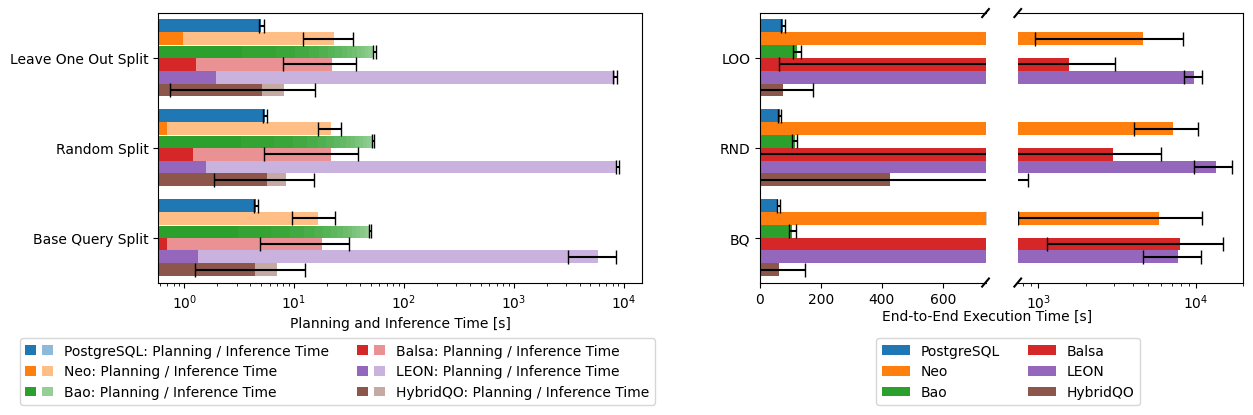

In [10]:
#methods = ['LEON', 'Balsa', 'Bao', 'Neo', 'PostgreSQL'] #reversed
methods = ['PostgreSQL', 'Neo', 'Bao', 'Balsa', 'LEON', 'HybridQO']
#methods = ['PostgreSQL', 'Bao']
experiments = [
    'leave_one_out_split_1',
    'random_split_1',
    'base_query_split_1',
][::-1]

experiment_labels = [
    'Leave One Out Split',
    'Random Split',
    'Base Query Split',
][::-1]

experiment_labels__short = ['LOO', 'RND', 'BQ'][::-1]

plot_colors = np.array(list(mcolors.TABLEAU_COLORS.keys()))

split = 'train'
bar_height = (1/(len(methods)+1))


#fig, axs = plt.subplots(1, 2, figsize=(10, 9))
plt.figure(figsize=(14, 3.5))

# PLANNING + INFERENCE PLOT
# =================================================================================
ax = plt.subplot2grid((1, 13), (0, 0), colspan=6, rowspan=1)

planning_handles = []
inference_handles = []
for mi, method in enumerate(methods):
    df_exp = df_sum[(df_sum['split']==split)&(df_sum['method']==method)]
    
    bar_pos = np.arange(len(experiments)) + ((len(methods)/2)*bar_height) - (mi*bar_height) - bar_height
    bar_color = plot_colors[mi]
    
    # Add Planning Bars
    # ===============================================
    planning_data = np.array([df_exp.loc[df_exp['experiment']==e,'planning_time'].item() for e in experiments]) / 1000.0
    
    # Special handling of Bao, as their inference time is part of the planning time reported by PostgreSQL
    if method == 'Bao':
        barh = ax.barh(bar_pos, planning_data, height=bar_height, label=method, align='edge', color=bar_color, zorder=1, facecolor='none') 
        
        faded_color = plt.get_cmap('tab10')(mi)[:-1] + (0.5,)
        cmap = LinearSegmentedColormap.from_list('CustomColormap', [plt.get_cmap('tab10')(mi), faded_color], N=256)
        grad = np.atleast_2d(np.linspace(0, 1, 16)) # last number defines amount of gradient steps, low to keep it visible
        for bar in barh:
            x, y = bar.get_xy()
            w = bar.get_width()
            h = bar.get_height()
            
            ax.imshow(grad, extent=[x, x+w, y, y+h], cmap=cmap, aspect='auto', zorder=0)
        
        # To add Bao's legend back
        barh = ax.barh(bar_pos, [0 for _ in range(len(experiments))], label=method, color=bar_color)
        
    else:
        barh = ax.barh(bar_pos, planning_data, height=(1/(len(methods)+1)), label=method, align='edge', color=bar_color)   
    planning_handles.append(barh)
    
    # Add Inference Bars
    # ===============================================
    inference_data = np.array([df_exp.loc[df_exp['experiment']==e,'inference_time'].item() for e in experiments]) / 1000.0
    
    planning_std = np.array([df_exp.loc[df_exp['experiment']==e,'planning_time.err'].item() for e in experiments]) / 1000.0
    inference_std = np.array([df_exp.loc[df_exp['experiment']==e,'inference_time.err'].item() for e in experiments]) / 1000.0
    xerr = np.array([np.sqrt(p**2 + i**2) for (p,i) in zip(planning_std, inference_std)])
    
    barh = ax.barh(bar_pos, inference_data, xerr=xerr, capsize=5, left=planning_data, height=(1/(len(methods)+1)), align='edge', color=bar_color, alpha=0.5)
    inference_handles.append(barh)
    

# Set up legend
legend_handles = [(p,h) for p,h in zip(planning_handles, inference_handles)]
legend_labels = [f"{m}: Planning / Inference Time" for m in methods]
ax.legend(legend_handles, legend_labels, handler_map={tuple: HandlerTuple(ndivide=None)}, bbox_to_anchor=(0.37, -0.18), ncol=2, loc='upper center')

ax.set_yticks(np.arange(len(experiments)))
ax.set_yticklabels(experiment_labels)

ax.set_ylim([-0.5, len(experiments)-0.5])
ax.set_xlabel('Planning and Inference Time [s]')
ax.set_xscale('log')

# EXECUTION PLOT
# =================================================================================
ax_left = plt.subplot2grid((1, 13), (0, 7), colspan=3, rowspan=1)
ax_right = plt.subplot2grid((1, 13), (0, 10), colspan=3, rowspan=1) 

execution_handles = []
for mi, method in enumerate(methods):
    df_exp = df_sum[(df_sum['split']==split)&(df_sum['method']==method)]
    
    bar_pos = np.arange(len(experiments)) + ((len(methods)/2)*bar_height) - (mi*bar_height) - bar_height
    bar_color = plot_colors[mi]
    
    # Add Execution Bars
    # ===============================================
    execution_data = np.array([df_exp.loc[df_exp['experiment']==e,'total_time'].item() for e in experiments]) / 1000.0
    
    execution_std = np.array([df_exp.loc[df_exp['experiment']==e,'total_time.err'].item() for e in experiments]) / 1000.0
    xerr = execution_std
    
    barh = ax_left.barh(bar_pos, execution_data, xerr=xerr, capsize=5, height=(1/(len(methods)+1)), align='edge', color=bar_color)
    barh = ax_right.barh(bar_pos, execution_data, xerr=xerr, capsize=5, height=(1/(len(methods)+1)), align='edge', color=bar_color)
    execution_handles.append(barh)

ax_left.set_yticks(np.array(bar_pos) + bar_height * len(methods)/2)

# Set up legend
ax_left.legend(execution_handles, methods, bbox_to_anchor=(1.1, -0.18), ncol=2, loc='upper center')

ax_left.spines['right'].set_visible(False)
ax_right.spines['left'].set_visible(False)

# Add the diagonal markings to show that the x-axis is broken
d = 0.015
kwargs = dict(transform=ax_left.transAxes, color='k', clip_on=False)
ax_left.plot((1-d, 1+d), (-d, +d), **kwargs)
ax_left.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
kwargs.update(transform=ax_right.transAxes)  # switch to the bottom axes
ax_right.plot((-d, +d), (1-d, 1+d), **kwargs)
ax_right.plot((-d, +d), (-d, +d), **kwargs)

ax_left.set_yticklabels(['LOO', 'RND', 'BQ'][::-1])
ax_right.yaxis.tick_right()
ax_right.set_yticks([])
ax_right.set_xticks([500, 2500, 4500, 6500, 8500])

ax_left.set_xlim([0, 740])
ax_right.set_xlim([740, 20000])
ax_right.set_xscale('log')

ax_left.set_ylim([-0.5, len(experiments)-0.5])
ax_right.set_ylim([-0.5, len(experiments)-0.5])

ax_left.text(400, -0.91, 'End-to-End Execution Time [s]', fontsize=10)

plt.subplots_adjust(wspace=.6)

plt.show()
None

# Results Figure: Test Set

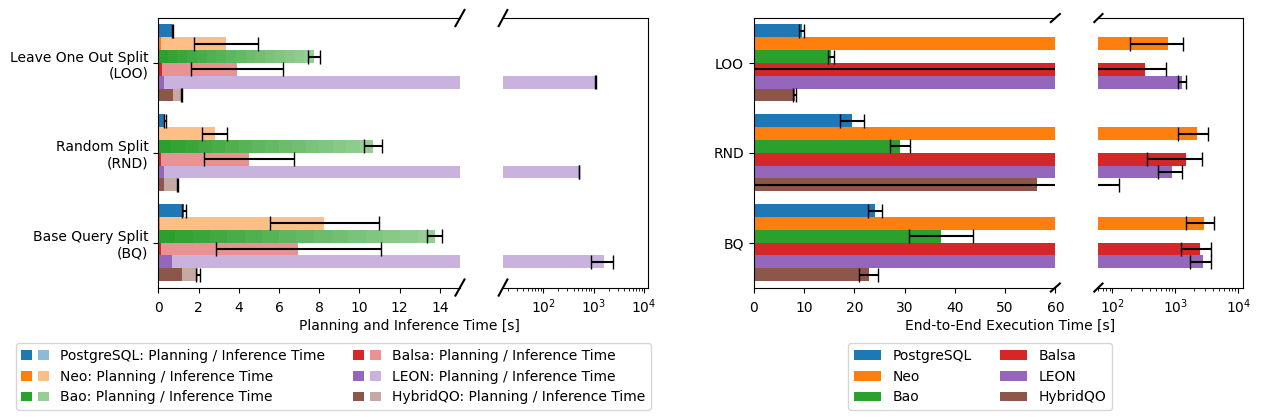

In [11]:
methods = ['PostgreSQL', 'Neo', 'Bao', 'Balsa', 'LEON', 'HybridQO']
experiments = [
    'leave_one_out_split_1',
    'random_split_1',
    'base_query_split_1',
][::-1]

experiment_labels = [
    'Leave One Out Split\n(LOO)',
    'Random Split\n(RND)',
    'Base Query Split\n(BQ)',
][::-1]

experiment_labels__short = ['LOO', 'RND', 'BQ'][::-1]

plot_colors = np.array(list(mcolors.TABLEAU_COLORS.keys()))

split = 'test'
bar_height = (1/(len(methods)+1))



plt.figure(figsize=(14, 3.5))

#
# ===============================================================================================================================
#  Planning & Inference Time Figure
# ===============================================================================================================================
#
ax_left = plt.subplot2grid((1, 35), (0, 0), colspan=10, rowspan=1)
ax_right = plt.subplot2grid((1, 35), (0, 11), colspan=5, rowspan=1)

planning_handles = []
inference_handles = []
for mi, method in enumerate(methods):
    df_exp = df_sum[(df_sum['split']==split)&(df_sum['method']==method)]
    
    bar_pos = np.arange(len(experiments)) + ((len(methods)/2)*bar_height) - (mi*bar_height) - bar_height
    bar_color = plot_colors[mi]
    
    # Add Planning Bars
    # ===============================================
    planning_data = np.array([df_exp.loc[df_exp['experiment']==e,'planning_time'].item() for e in experiments]) / 1000.0
    
    # Special handling of Bao, as their inference time is part of the planning time reported by PostgreSQL
    if method == 'Bao':
        barh = ax_left.barh(bar_pos, planning_data, height=bar_height, label=method, align='edge', color=bar_color, zorder=1, facecolor='none') 
        
        faded_color = plt.get_cmap('tab10')(mi)[:-1] + (0.5,)
        cmap = LinearSegmentedColormap.from_list('CustomColormap', [plt.get_cmap('tab10')(mi), faded_color], N=256)
        grad = np.atleast_2d(np.linspace(0, 1, 16)) # last number defines amount of gradient steps, low to keep it visible
        for bar in barh:
            x, y = bar.get_xy()
            w = bar.get_width()
            h = bar.get_height()
            
            ax_left.imshow(grad, extent=[x, x+w, y, y+h], cmap=cmap, aspect='auto', zorder=0)
        
        # To add Bao's legend back
        barh = ax_left.barh(bar_pos, [0 for _ in range(len(experiments))], label=method, color=bar_color)
        ax_right.barh(bar_pos, [0 for _ in range(len(experiments))], label=method, color=bar_color)
        
    else:
        barh = ax_left.barh(bar_pos, planning_data, height=(1/(len(methods)+1)), label=method, align='edge', color=bar_color)   
        barh = ax_right.barh(bar_pos, planning_data, height=(1/(len(methods)+1)), label=method, align='edge', color=bar_color)   
        
    planning_handles.append(barh)
    
    # Add Inference Bars
    # ===============================================
    inference_data = np.array([df_exp.loc[df_exp['experiment']==e,'inference_time'].item() for e in experiments]) / 1000.0
    
    planning_std = np.array([df_exp.loc[df_exp['experiment']==e,'planning_time.err'].item() for e in experiments]) / 1000.0
    inference_std = np.array([df_exp.loc[df_exp['experiment']==e,'inference_time.err'].item() for e in experiments]) / 1000.0
    xerr = np.array([np.sqrt(p**2 + i**2) for (p,i) in zip(planning_std, inference_std)])
    
    barh = ax_left.barh(bar_pos, inference_data, xerr=xerr, capsize=5, left=planning_data, height=(1/(len(methods)+1)), align='edge', color=bar_color, alpha=0.5)
    ax_right.barh(bar_pos, inference_data, xerr=xerr, capsize=5, left=planning_data, height=(1/(len(methods)+1)), align='edge', color=bar_color, alpha=0.5)
    inference_handles.append(barh)

ax_left.set_yticks(range(len(experiment_labels)))
ax_left.set_xticks([0, 2, 4, 6, 8, 10, 12, 14])
ax_left.set_yticklabels(experiment_labels)
ax_left.tick_params(axis='x', pad=6)
ax_right.yaxis.tick_right()
ax_right.set_yticks([])

ax_left.spines['right'].set_visible(False)
ax_right.spines['left'].set_visible(False)

ax_left.set_xlim([0, 15])
ax_right.set_xlim([16, 10**4 * 1.2])
ax_right.set_xscale('log')

# Add the diagonal markings to show that the x-axis is broken
d = 0.015
kwargs = dict(transform=ax_left.transAxes, color='k', clip_on=False)
ax_left.plot((1-d, 1+d), (-d*2, +d*2), **kwargs)
ax_left.plot((1-d, 1+d), (1-d*2, 1+d*2), **kwargs)
kwargs.update(transform=ax_right.transAxes)  # switch to the bottom axes
angle_scale = 2
ax_right.plot((-d*angle_scale, +d*angle_scale), (1-d*2, 1+d*2), **kwargs)
ax_right.plot((-d*angle_scale, +d*angle_scale), (-d*2, +d*2), **kwargs)
    
# Set up legend
legend_handles = [(p,h) for p,h in zip(planning_handles, inference_handles)]
legend_labels = [f"{m}: Planning / Inference Time" for m in methods]
ax_left.legend(legend_handles, legend_labels, handler_map={tuple: HandlerTuple(ndivide=None)}, bbox_to_anchor=(0.58, -0.18), ncol=2, loc='upper center')

ax_left.set_ylim([-0.5, len(experiments)-0.5])
ax_right.set_ylim([-0.5, len(experiments)-0.5])
ax_left.text(7, -0.97, 'Planning and Inference Time [s]', fontsize=10)


#
# ===============================================================================================================================
#  End-to-End Execution Time Figure
# ===============================================================================================================================
#
ax_left = plt.subplot2grid((1, 35), (0, 19), colspan=10, rowspan=1)
ax_right = plt.subplot2grid((1, 35), (0, 30), colspan=5, rowspan=1) 

execution_handles = []
for mi, method in enumerate(methods):
    df_exp = df_sum[(df_sum['split']==split)&(df_sum['method']==method)]
    
    bar_pos = np.arange(len(experiments)) + ((len(methods)/2)*bar_height) - (mi*bar_height) - bar_height
    bar_color = plot_colors[mi]
    
    # Add Execution Bars
    # ===============================================
    execution_data = np.array([df_exp.loc[df_exp['experiment']==e,'total_time'].item() for e in experiments]) / 1000.0
    
    execution_std = np.array([df_exp.loc[df_exp['experiment']==e,'total_time.err'].item() for e in experiments]) / 1000.0
    xerr = execution_std
    
    barh = ax_left.barh(bar_pos, execution_data, xerr=xerr, capsize=5, height=(1/(len(methods)+1)), align='edge', color=bar_color)
    barh = ax_right.barh(bar_pos, execution_data, xerr=xerr, capsize=5, height=(1/(len(methods)+1)), align='edge', color=bar_color)
    execution_handles.append(barh)
ax_left.set_yticks(np.array(bar_pos) + bar_height * len(methods)/2)

# Set up legend
ax_left.legend(execution_handles, methods, bbox_to_anchor=(0.75, -0.18), ncol=2, loc='upper center')

ax_left.spines['right'].set_visible(False)
ax_right.spines['left'].set_visible(False)

# Add the diagonal markings to show that the x-axis is broken
d = 0.015
kwargs = dict(transform=ax_left.transAxes, color='k', clip_on=False)
ax_left.plot((1-d, 1+d), (-d, +d), **kwargs)
ax_left.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
kwargs.update(transform=ax_right.transAxes)  # switch to the bottom axes
angle_scale = 1.9
ax_right.plot((-d*angle_scale, +d*angle_scale), (1-d, 1+d), **kwargs)
ax_right.plot((-d*angle_scale, +d*angle_scale), (-d, +d), **kwargs)


ax_left.tick_params(axis='x', pad=5.8)
ax_left.set_yticklabels(['LOO', 'RND', 'BQ'][::-1])

ax_right.yaxis.tick_right()
ax_right.set_yticks([])

ax_left.set_xlim([0, 60])
ax_right.set_xlim([60, 10**4*1.2])
ax_right.set_xscale('log')

ax_left.set_ylim([-0.5, len(experiments)-0.5])
ax_right.set_ylim([-0.5, len(experiments)-0.5])

ax_left.text(30, -0.97, 'End-to-End Execution Time [s]', fontsize=10)


plt.subplots_adjust(wspace=.6)
plt.show()
None

## Inference + Planning vs. Execution Time on all splits

In [12]:
def plot_scatter_execution(ax, df, min_val, max_val, legend_values, title):
    # Plot non timed out queries (majority)
    df_train = df[(df['split'] == 'train') & (df['timed_out'] == 0)]
    df_test = df[(df['split'] == 'test') & (df['timed_out'] == 0)]
    tr1 = ax.scatter(df_train['planning_time'] + df_train['inference_time'], df_train['execution_time'], color='tab:blue')
    te1 = ax.scatter(df_test['planning_time'] + df_test['inference_time'], df_test['execution_time'], color='tab:orange')
    
    # Show timed out queries a "X" markers instead of circles
    df_train = df[(df['split'] == 'train') & (df['timed_out'] > 0)]
    df_test = df[(df['split'] == 'test') & (df['timed_out'] > 0)]
    tr2 = ax.scatter(df_train['planning_time'] + df_train['inference_time'], df_train['execution_time'], color='tab:blue', marker='x')
    te2 = ax.scatter(df_test['planning_time'] + df_test['inference_time'], df_test['execution_time'], color='tab:orange', marker='x')
    
    ax.set_ylabel('Execution Time [ms]')
    ax.set_xlabel('Inference + Planning Time [ms]')
    
    l, = ax.plot([min_val, max_val], [min_val, max_val], color='tab:gray', linestyle='-.')

    ax.set_ylim([min_val, max_val])
    ax.set_yscale('log')

    ax.set_xlim([min_val, max_val])
    ax.set_xscale('log')
    
    #legend = ax.legend([(tr1, tr2), (te1, te2), l], legend_values, handler_map={tuple: HandlerTuple(ndivide=None)})
    
    ax.set_title(title)
    ax.grid(True)

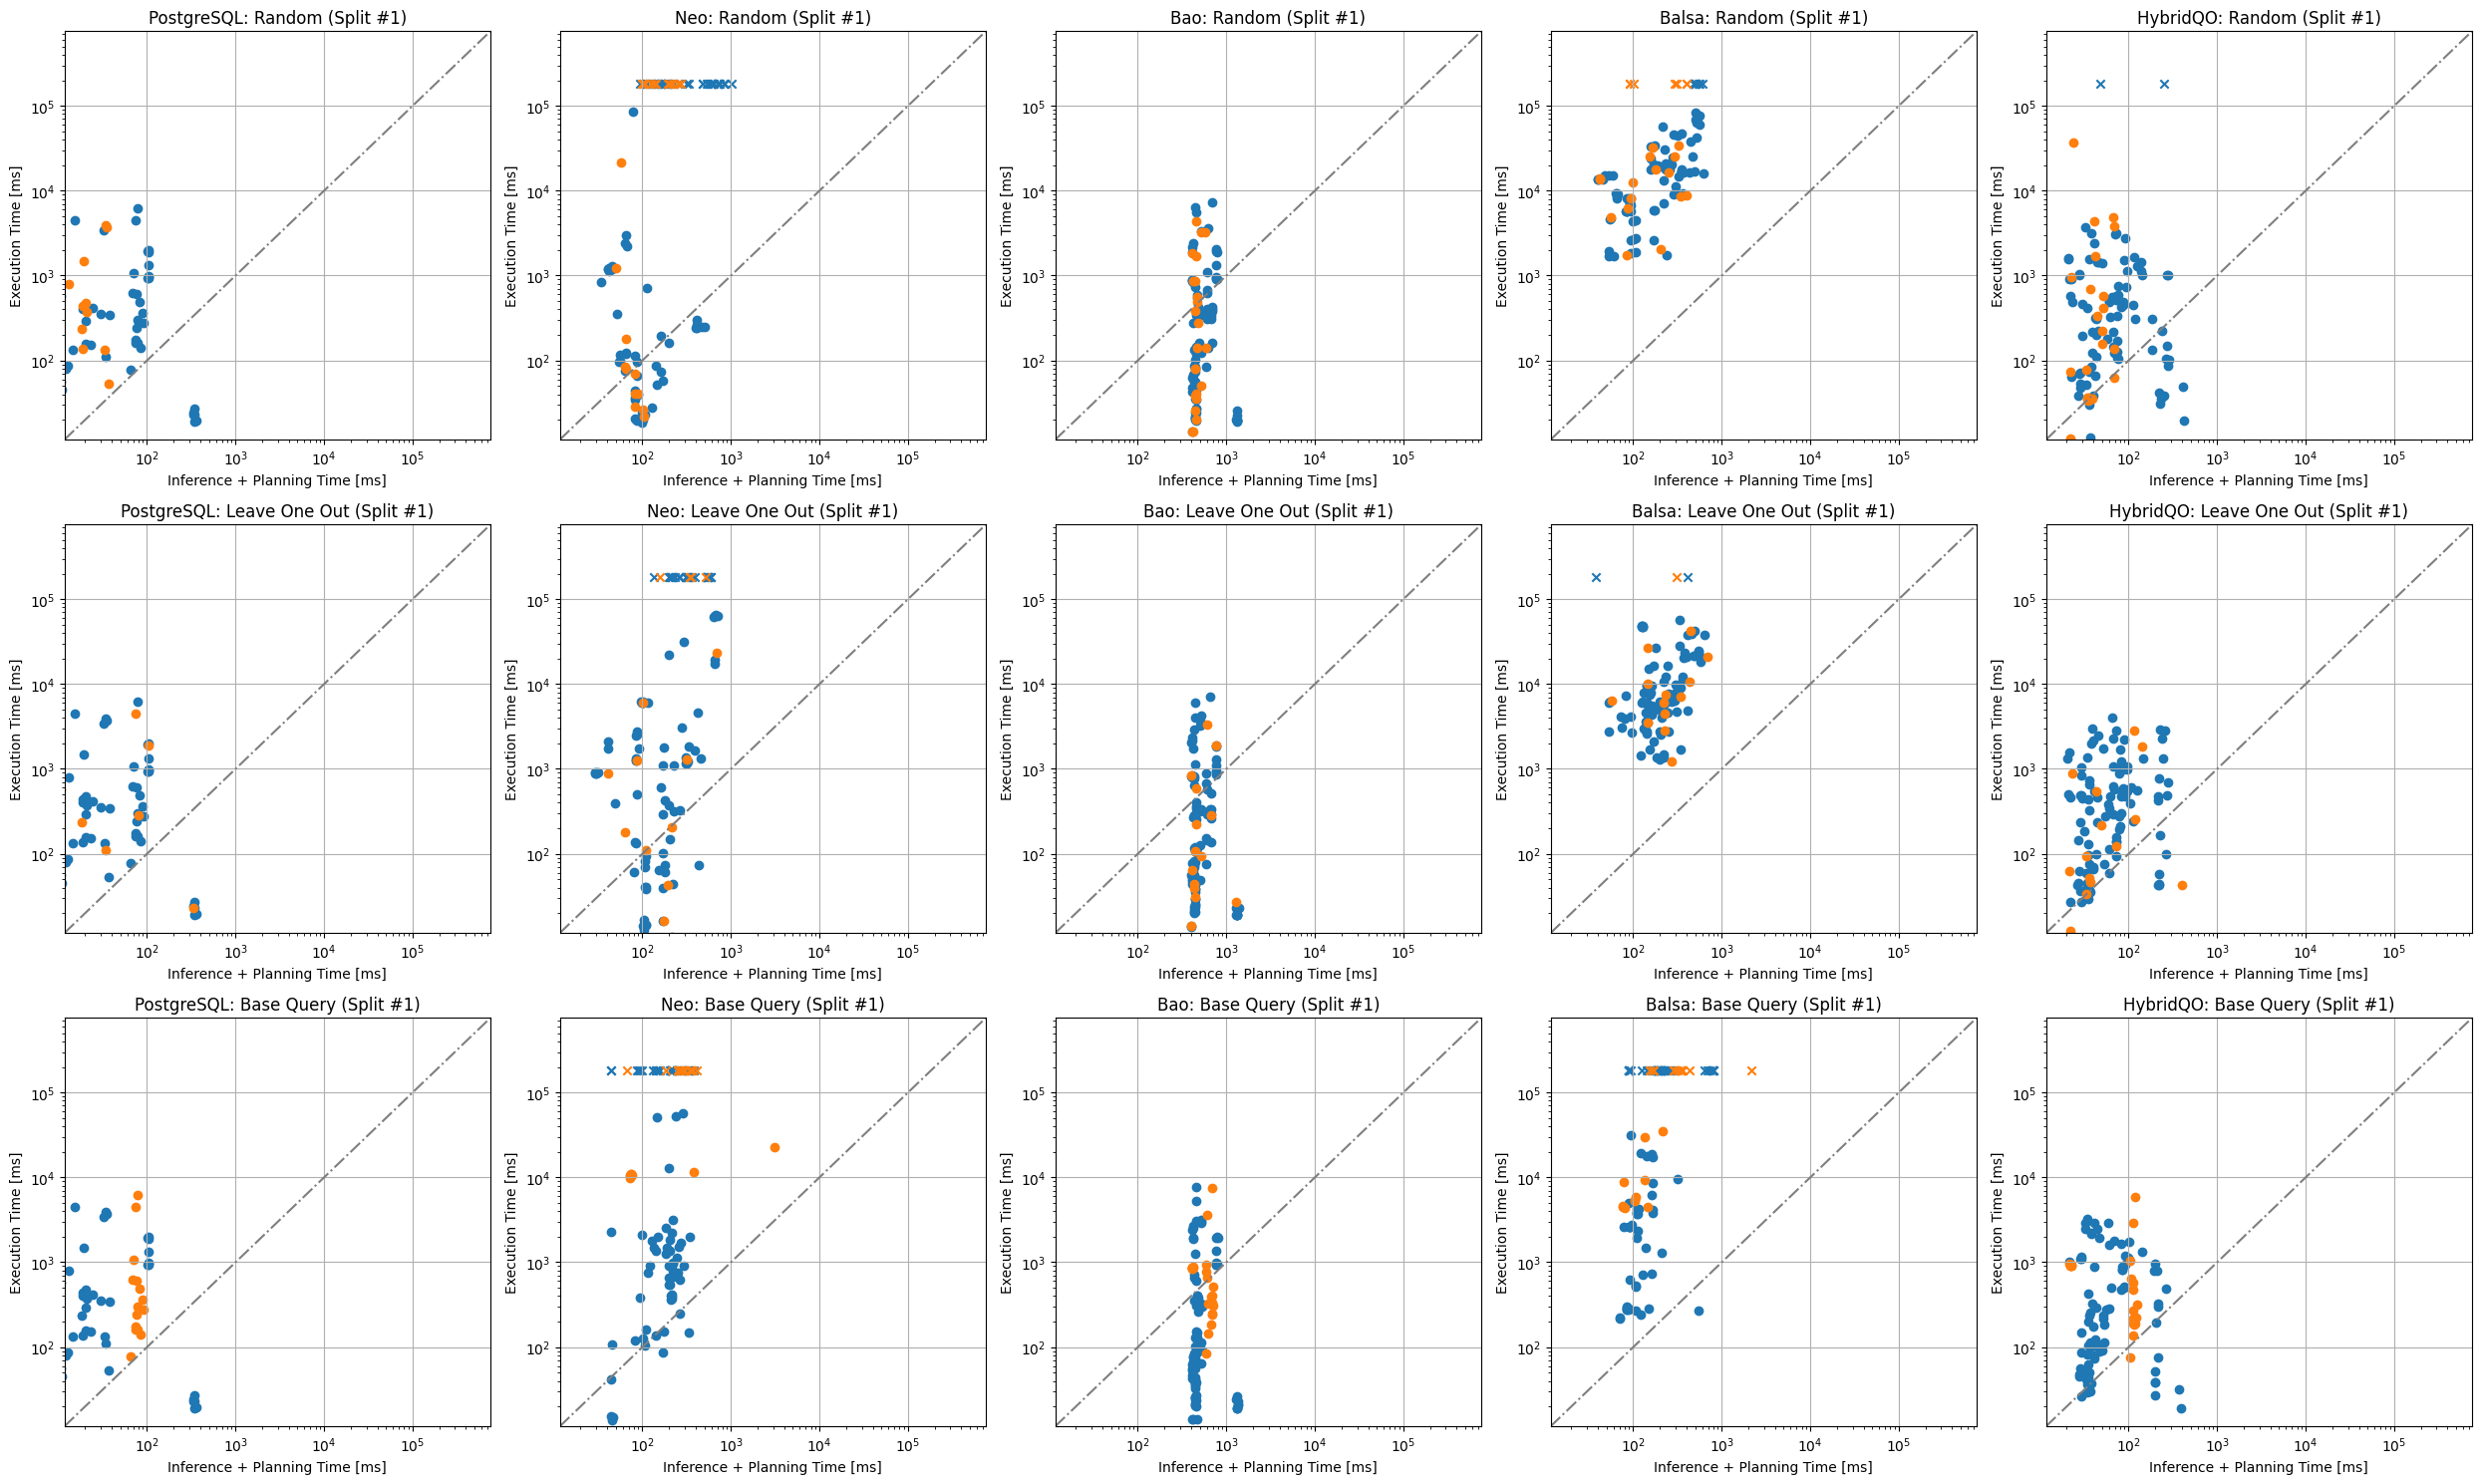

In [14]:
#experiments = ['leave_one_out_split_1', 'leave_one_out_split_2', 'leave_one_out_split_3',
#    'random_split_1', 'random_split_2', 'random_split_3',
#    'base_query_split_1', 'base_query_split_2', 'base_query_split_3']
experiments = ['random_split_1', 'leave_one_out_split_1', 'base_query_split_1']

def experiment_label(experiment_name):
    if 'leave_one_out' in experiment_name:
        return f'Leave One Out (Split #{experiment_name[-1]})' 
    elif 'random' in experiment_name:
        return f'Random (Split #{experiment_name[-1]})'
    elif 'base_query' in experiment_name:
        return f'Base Query (Split #{experiment_name[-1]})'
    else:
        return ''
    
num_experiments = len(experiments)
num_methods = 5
plot_scale = 5
legend_values = ['Training Set Queries', 'Test Set Queries', 'Inference + Planning Time == Execution Time']

fig, axs = plt.subplots(num_experiments, num_methods, figsize=(plot_scale*num_methods, plot_scale*num_experiments))
min_val = df_agg['total_time'].min() * 0.8
max_val = df_agg['total_time'].max() * 1.2

#for m_id, method in enumerate(['PostgreSQL', 'Bao']):
for m_id, method in enumerate(['PostgreSQL', 'Neo', 'Bao', 'Balsa', 'HybridQO']):
    for e_id, experiment in enumerate(experiments):
        ax = axs[e_id, m_id]
        plot_scatter_execution(ax, df_agg[(df_agg['method'] == method) & (df_agg['experiment'] == experiment)], min_val=min_val, max_val=max_val, legend_values=legend_values, title=f"{method}: {experiment_label(experiment)}")

plt.tight_layout()
plt.show()
None

# Inference + Planning vs. Training Time

In [15]:
methods = ['PostgreSQL', 'Neo', 'Bao', 'Balsa', 'LEON', 'HybridQO']
data = {}

for m in methods:
    data[m] = {'train': [], 'test': []}
    
    for experiment in df_training.index:
        training_time = df_training.loc[experiment, m]
        
        for split in ['train', 'test']:
            df_selected = df_agg[(df_agg['method']==m) & (df_agg['experiment']==experiment) & (df_agg['split']==split)]
        
            inference_time = df_selected['inference_time'].sum()
            planning_time = df_selected['planning_time'].sum()
            execution_time = df_selected['execution_time'].sum()
        
            data[m][split].append((training_time, inference_time + planning_time, execution_time))

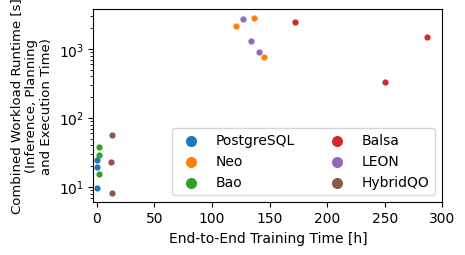

In [16]:
fig, ax = plt.subplots(figsize=(4.5,2.5))

split = 'test'
for m in methods:
    if m not in data.keys():
        continue
    m_data = np.array(data[m][split])
    
    ax.scatter(m_data[:,0], (m_data[:,1] + m_data[:,2]) / 1000.0, label=m, s=12)
    ax.set_xlabel('End-to-End Training Time [h]')
    ax.set_ylabel('Combined Workload Runtime [s]\n(Inference, Planning\nand Execution Time)', fontsize=9.5)
    ax.legend(loc='lower right', ncol=2, markerscale=2)
    ax.set_yscale('log')
    ax.set_xlim([-3, 300])
    
plt.show()
None

### Direct Comparisons

In [233]:
def xticks_with_train_split(ax, df, experiment='base_query_split_1'):
    labels = df['query_ident'].apply(lambda x: f"* {x}" if x in TEST_QUERIES[experiment] else x)
    ax.set_xticklabels(labels, rotation=90)

def plot_ax(ax, df, title, ymax, experiment='base_query_split_1', yscale=None):
    ax.set_title(title)
    ax.bar(df['query_ident'], df['execution_time'])
    ax.bar(df['query_ident'], df['planning_time'], bottom=df['execution_time'])
    ax.bar(df['query_ident'], df['inference_time'], bottom=df['execution_time']+df['planning_time'])
    
    ax.set_xlim([-0.5, df.shape[0]-0.5])
    ax.set_ylim(top=ymax * 1.1)
    xticks_with_train_split(ax, df, experiment=experiment)
    ax.set_ylabel('Time [ms]')
    ax.set_xlabel('Query')
    ax.legend(['Execution Time', 'Planning Time', 'Inference Time'])

    if yscale is not None:
        ax.set_yscale(yscale)
    
def plot_comparison_ax(ax, df, df2, title, ymax, experiment='base_query_split_1', yscale=None):
    ax.set_title(title)
    colors = []
    for x in (df2['total_time'] - df['total_time']):
        if x >= 0:
            colors.append('green')
        else:
            colors.append('red')

    ax.bar(df['query_ident'], df2['total_time'] - df['total_time'], color=colors)
    ax.set_xlim([-0.5, df.shape[0]-0.5])
    ax.set_ylim([-ymax, ymax])
    
    xticks_with_train_split(ax, df, experiment=experiment)
    ax.set_ylabel('Difference in Total Time [ms]')
    ax.set_xlabel('Query')
    
    if yscale is not None:
        ax.set_yscale(yscale)
    
fig_size = (18,10)

### PostgreSQL vs. Leon

/tmp/ipykernel_40204/438517046.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
/tmp/ipykernel_40204/438517046.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
/tmp/ipykernel_40204/438517046.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


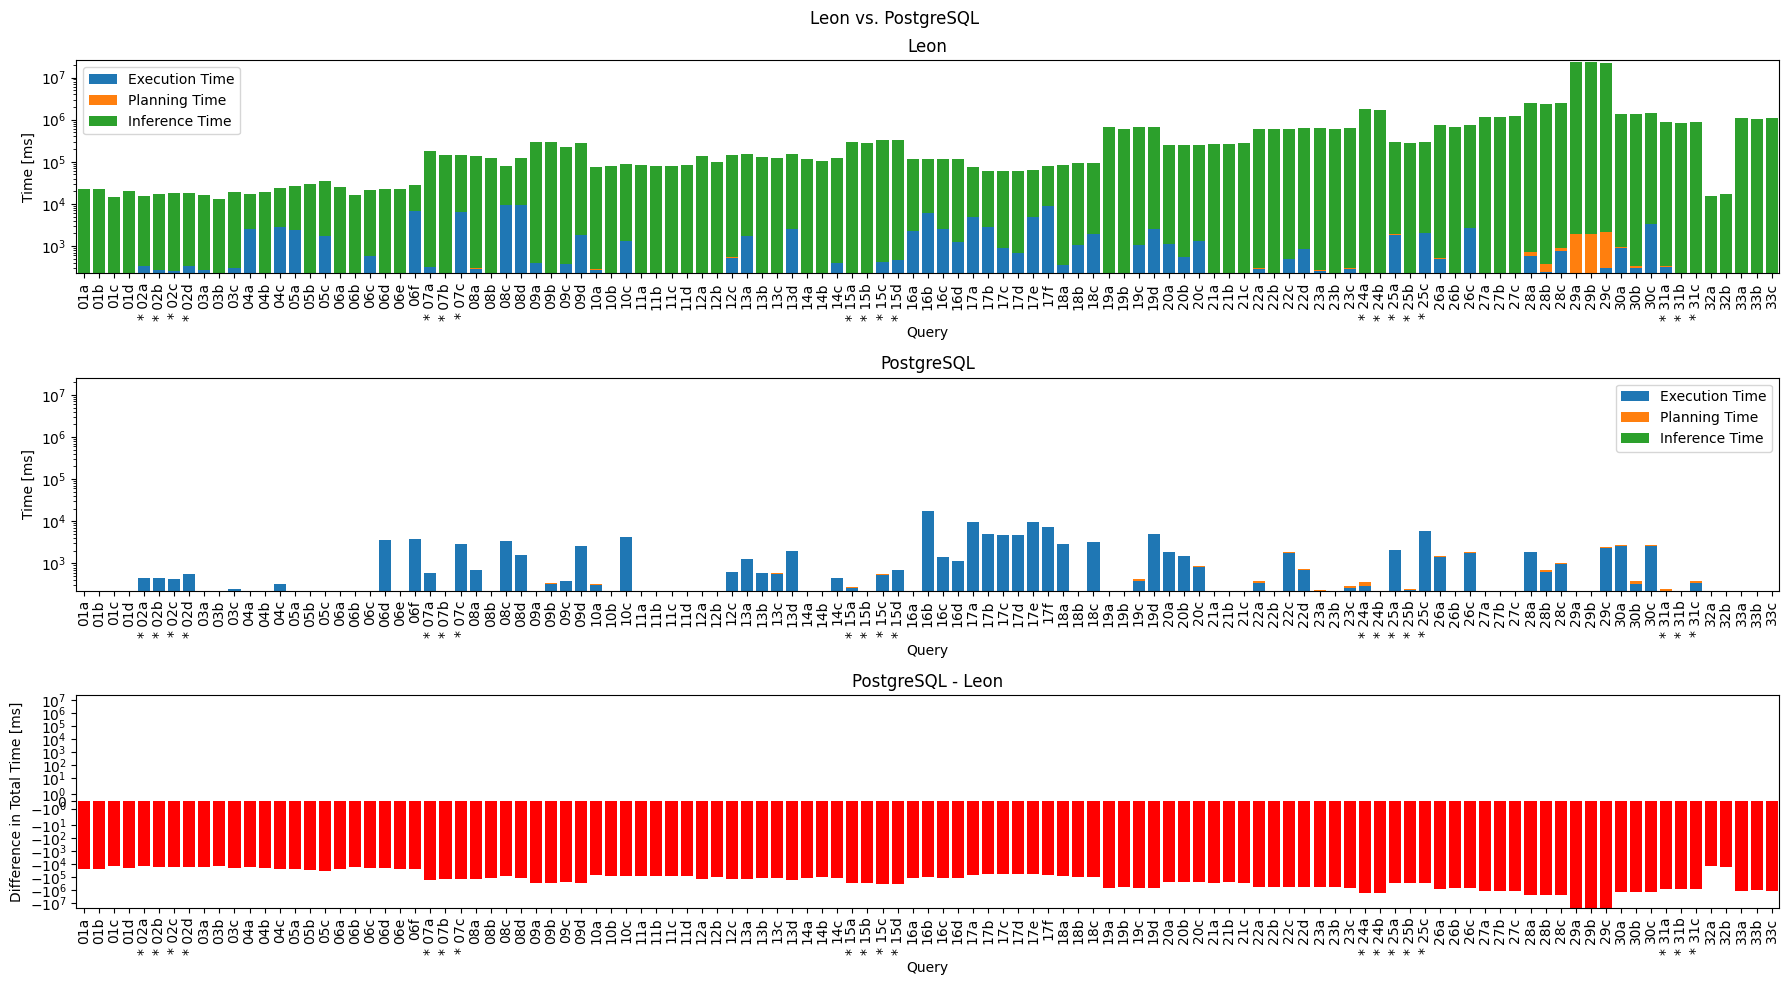

In [235]:
df_leon = pd.read_csv(os.path.join('leon', 'log__leave_one_out_1.csv'), sep=';')
df_leon['inference_time'] *= 1000.0
df_leon['total_time'] = df_leon['inference_time'] + df_leon['planning_time'] + df_leon['execution_time']

df_leon['query_ident'] = df_leon['query_ident'].apply(lambda x: query_file_to_ident(x))
df_leon = df_leon.sort_values(['query_ident']).reset_index(drop=True)

df_pg = df_agg[(df_agg['experiment']=='leave_one_out_split_1') & (df_agg['method']=='PostgreSQL')]

fig, axs = plt.subplots(3, figsize=fig_size)
ymax = max([df_pg['total_time'].max(), df_leon['total_time'].max()])

plot_ax(axs[0], df_leon, 'Leon', ymax, yscale='log')
plot_ax(axs[1], df_pg, 'PostgreSQL', ymax, yscale='log')
axs[1].set_ylim(axs[0].get_ylim())
plot_comparison_ax(axs[2], df_leon, df_pg, 'PostgreSQL - Leon', ymax, yscale='symlog')

plt.suptitle('Leon vs. PostgreSQL')
plt.tight_layout()
plt.show()

None

In [251]:

print(f"\tLeon\t\tPG")
print(f"\t---\t\t---")
counter = 0
for (a, row_leon), (b, row_pg) in zip(df_leon.iterrows(), df_pg.iterrows()):
    
    leon_time = row_leon['execution_time'] + row_leon['planning_time']
    pg_time = row_pg['execution_time'] + row_pg['planning_time']
    
    if leon_time + 500 < pg_time:
        print(f"{row_leon['query_ident']}:\t{leon_time:.2f}\t\t{pg_time:.2f}")
        counter += 1
    else:
        continue
        
print()
print(f"{counter} queries are faster by Leon")

	Leon		PG
	---		---
06d:	222.46		3642.16
09d:	1804.78		2634.77
10c:	1351.22		4168.85
16b:	6141.30		17180.92
17a:	4829.31		9368.81
17b:	2859.65		5109.29
17c:	893.41		4841.51
17d:	704.41		4804.48
17e:	4794.28		9583.85
18a:	363.69		2885.72
18c:	1989.40		3297.82
19d:	2511.35		5099.07
20a:	1147.60		1907.38
20b:	556.97		1478.50
22c:	496.20		1842.90
25c:	2098.50		5744.71
26a:	511.93		1467.60
28a:	715.84		1905.74
30a:	946.95		2719.05

19 queries are faster by Leon


/tmp/ipykernel_40204/3124820303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pg['inference_time'] = 0
/tmp/ipykernel_40204/3124820303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pg['total_time'] = df_pg['planning_time'] + df_pg['execution_time']
/tmp/ipykernel_40204/438517046.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
/tmp/ipykernel_40204/438517046.py:3: UserWarning: FixedFormatter should only be used toge

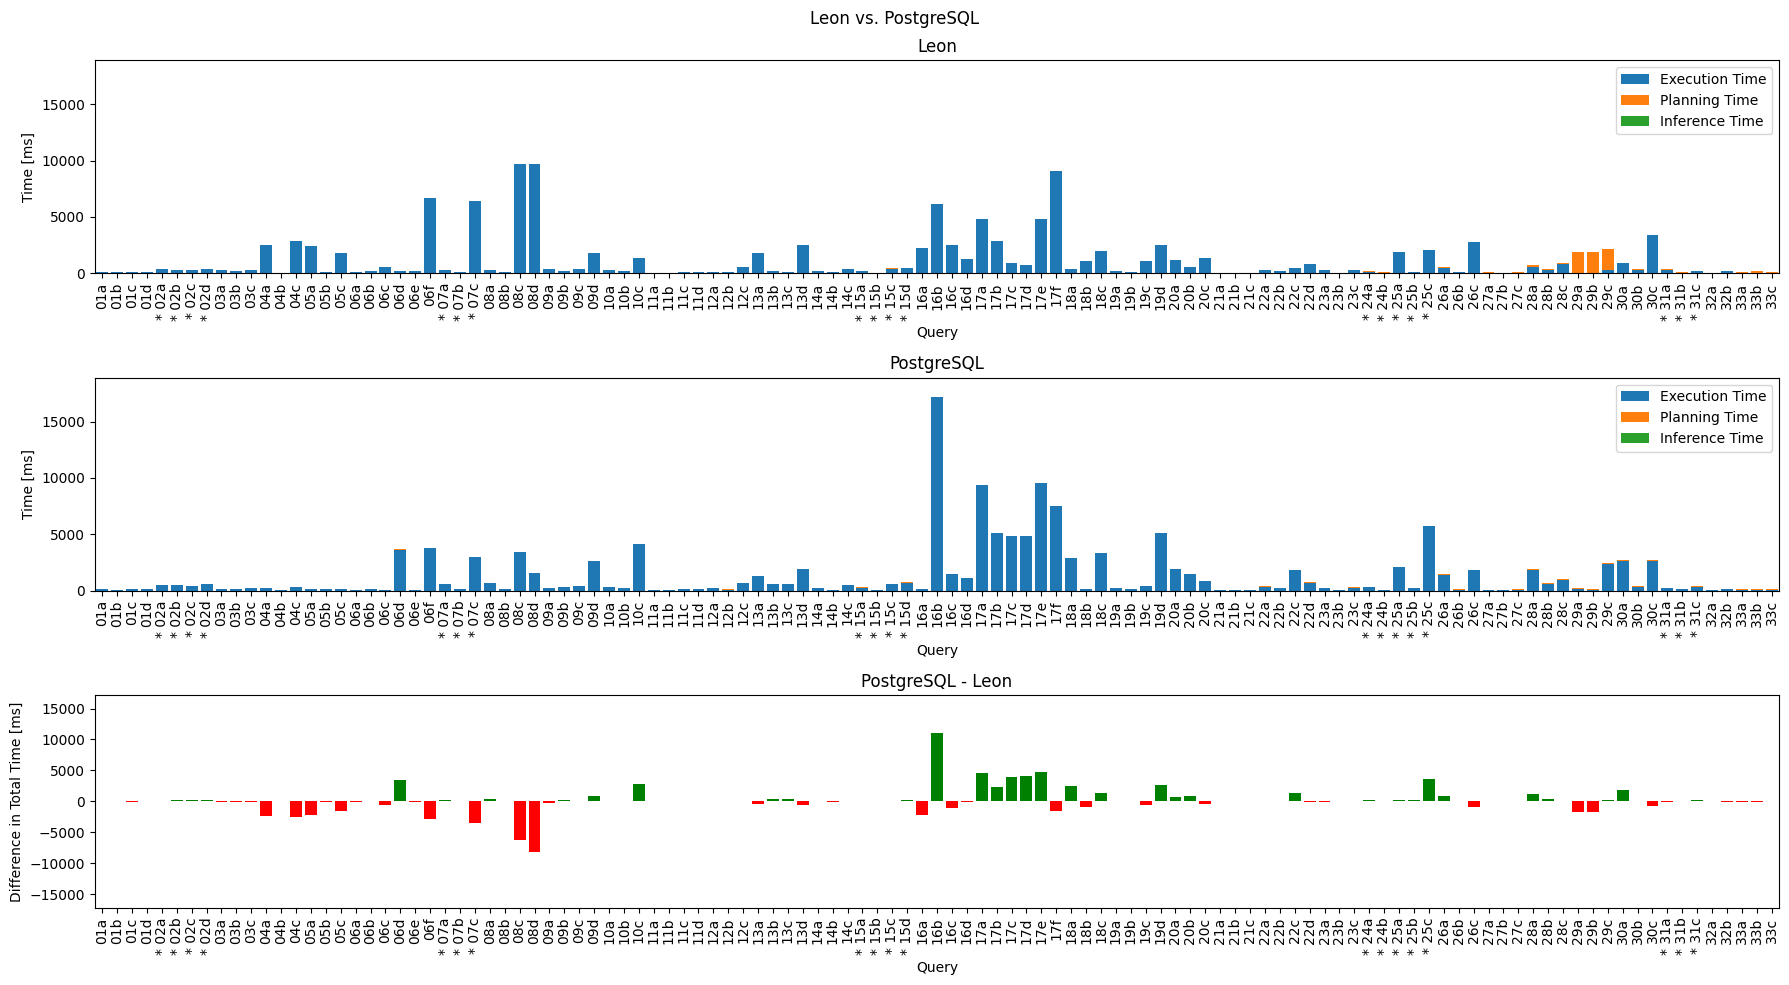

In [247]:
df_leon = pd.read_csv(os.path.join('leon', 'log__leave_one_out_1.csv'), sep=';')
df_leon['inference_time'] *= 1000.0
df_leon['inference_time'] = 0
df_leon['total_time'] = df_leon['planning_time'] + df_leon['execution_time']

df_leon['query_ident'] = df_leon['query_ident'].apply(lambda x: query_file_to_ident(x))
df_leon = df_leon.sort_values(['query_ident']).reset_index(drop=True)

df_pg = df_agg[(df_agg['experiment']=='leave_one_out_split_1') & (df_agg['method']=='PostgreSQL')]
df_pg['inference_time'] = 0
df_pg['total_time'] = df_pg['planning_time'] + df_pg['execution_time']

fig, axs = plt.subplots(3, figsize=fig_size)
ymax = max([df_pg['total_time'].max(), df_leon['total_time'].max()])

plot_ax(axs[0], df_leon, 'Leon', ymax)
plot_ax(axs[1], df_pg, 'PostgreSQL', ymax)
axs[1].set_ylim(axs[0].get_ylim())
plot_comparison_ax(axs[2], df_leon, df_pg, 'PostgreSQL - Leon', ymax)

plt.suptitle('Leon vs. PostgreSQL')
plt.tight_layout()
plt.show()

None